# Regressão Linear Simples aplicado ao consumo de Cerveja em SP



Esse notebook tem por objetivo aplicar os conhecimentos de Regressão Linear Simples em um conjunto de dados de Consumo de Cerveja em São Paulo no ano de 2015. 

[Dataset Disponível no kaggle](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo).

O notebook está dividido nos seguintes itens:


*   Importando Modulos
*   Carregando Dataset
*   Pré-processamento de dados
*   Preparação do Modelo
*   Treinamento
  *   Treino
  *   Teste


## O que é Regressão?

Regressão contempla o conjunto de métodos de aprendizado de máquina capaz de estimar relações entre variáveis contínuas. O objetivo das técnicas de regressão é reduzir o fenômeno a uma equação matemática onde a característica a ser predita será a variável dependente, tendo como suas variáveis independentes uma ou mais features do conjunto de dados. A regressão linear pode ser simples, multivariável, linear e não-linear.

Hoje iremos aplicar somente a regressão simples e linear.






## Importing modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## Carregando Dataset


In [ ]:
dataPath = '/content/drive/MyDrive/DataSets/Machine_Learning/Consumo_cerveja.csv'

df = pd.read_csv(dataPath)
df.columns = df.columns.str.replace(' ','_').str.replace('(','').str.replace(')','').str.lower()

df

,data,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacao_mm,final_de_semana,consumo_de_cerveja_litros
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(941, 7)

##Pré-processamento de dados


In [ ]:
df.isnull().sum()

data                         576
temperatura_media_c          576
temperatura_minima_c         576
temperatura_maxima_c         576
precipitacao_mm              576
final_de_semana              576
consumo_de_cerveja_litros    576
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   data                       365 non-null    object 
 1   temperatura_media_c        365 non-null    object 
 2   temperatura_minima_c       365 non-null    object 
 3   temperatura_maxima_c       365 non-null    object 
 4   precipitacao_mm            365 non-null    object 
 5   final_de_semana            365 non-null    float64
 6   consumo_de_cerveja_litros  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [ ]:
missing_value = df.consumo_de_cerveja_litros.isna()
missing_value[missing_value == True]

365    True
366    True
367    True
368    True
369    True
       ... 
936    True
937    True
938    True
939    True
940    True
Name: consumo_de_cerveja_litros, Length: 576, dtype: bool

Verifiquei que há 576 linhas que estão vazias, portanto utilizei o metodo dropna() do Pandas. De acordo com a documentação: "Pandas DataFrame dropna() function is used to remove rows and columns with Null/NaN values." 



In [ ]:
df_noNull = df.dropna()
df_noNull

,data,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacao_mm,final_de_semana,consumo_de_cerveja_litros
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467


In [ ]:
df_noNull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   data                       365 non-null    object 
 1   temperatura_media_c        365 non-null    object 
 2   temperatura_minima_c       365 non-null    object 
 3   temperatura_maxima_c       365 non-null    object 
 4   precipitacao_mm            365 non-null    object 
 5   final_de_semana            365 non-null    float64
 6   consumo_de_cerveja_litros  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 22.8+ KB


In [ ]:
df_noNull = df_noNull.convert_dtypes()
df_noNull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   data                       365 non-null    string 
 1   temperatura_media_c        365 non-null    string 
 2   temperatura_minima_c       365 non-null    string 
 3   temperatura_maxima_c       365 non-null    string 
 4   precipitacao_mm            365 non-null    string 
 5   final_de_semana            365 non-null    Int64  
 6   consumo_de_cerveja_litros  365 non-null    float64
dtypes: Int64(1), float64(1), string(5)
memory usage: 23.2 KB


Como visualizado acima, alguma das colunas estão sendo reconhecidas como string. Indentifiquei que os dados estão no padrão brasileiro de **' , '** e em python se utiliza **' . '** então abaixo eu realizei a mudança dos padróes e defini como float.

In [ ]:
df_noNull.iloc[:,1:5] = df_noNull.iloc[:,1:5].apply(lambda x: x.str.replace(',', '.').astype(float))
df_noNull

,data,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacao_mm,final_de_semana,consumo_de_cerveja_litros
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1,32.307
361,2015-12-28,22.64,21.1,26.7,0.0,0,26.095
362,2015-12-29,21.68,20.3,24.1,10.3,0,22.309
363,2015-12-30,21.38,19.3,22.4,6.3,0,20.467


In [ ]:
df_noNull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   data                       365 non-null    string 
 1   temperatura_media_c        365 non-null    float64
 2   temperatura_minima_c       365 non-null    float64
 3   temperatura_maxima_c       365 non-null    float64
 4   precipitacao_mm            365 non-null    float64
 5   final_de_semana            365 non-null    Int64  
 6   consumo_de_cerveja_litros  365 non-null    float64
dtypes: Int64(1), float64(5), string(1)
memory usage: 23.2 KB


In [ ]:
df_noNull.describe()

,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacao_mm,final_de_semana,consumo_de_cerveja_litros
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


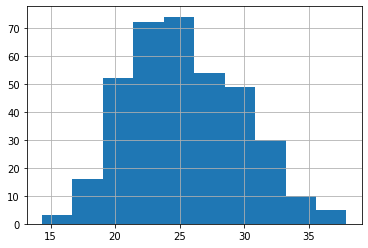

In [ ]:
df_noNull.consumo_de_cerveja_litros.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


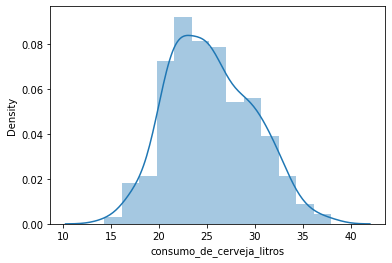

In [ ]:
sns.distplot(df_noNull.consumo_de_cerveja_litros)

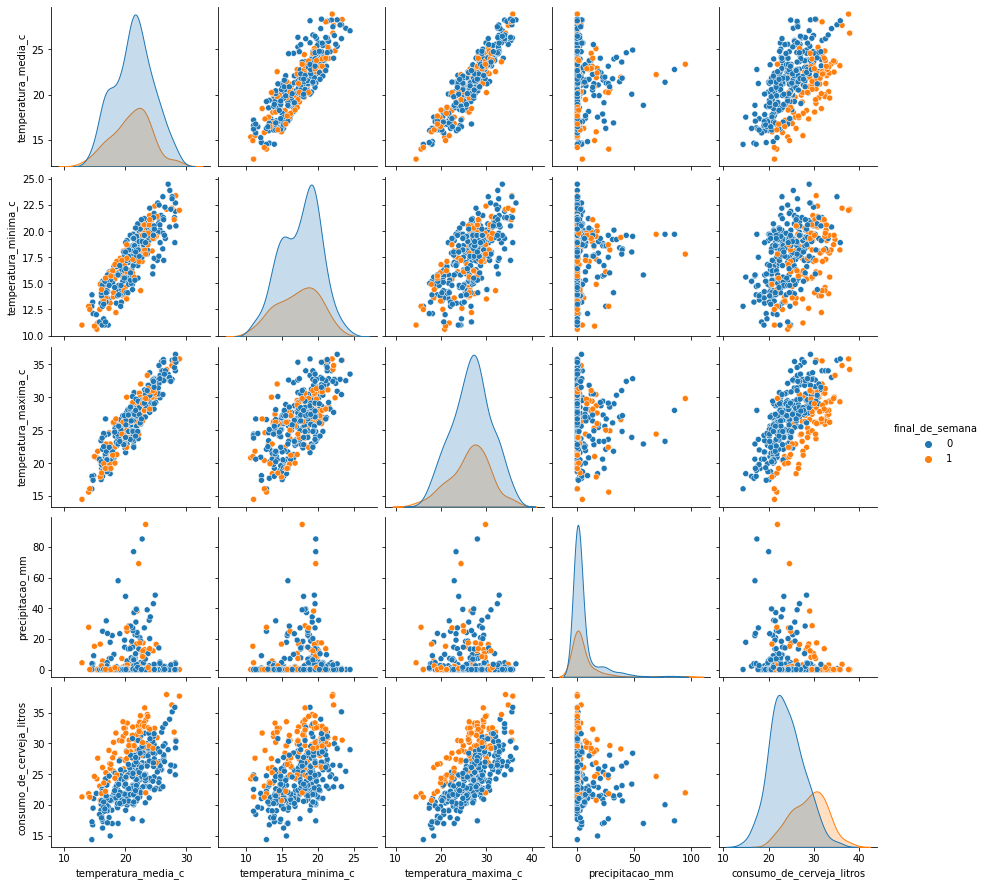

In [ ]:
sns.pairplot(df_noNull, hue='final_de_semana')

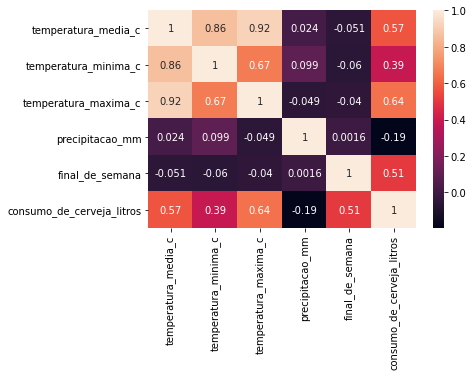

In [ ]:
sns.heatmap(df_noNull.corr(), annot=True)

##Preparação do Modelo
Para coluna "Temperatura Maxima (C)"

In [ ]:
df_noNull

,data,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacao_mm,final_de_semana,consumo_de_cerveja_litros
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1,32.307
361,2015-12-28,22.64,21.1,26.7,0.0,0,26.095
362,2015-12-29,21.68,20.3,24.1,10.3,0,22.309
363,2015-12-30,21.38,19.3,22.4,6.3,0,20.467


In [ ]:
x = df_noNull[['temperatura_maxima_c']]
x.head(3)

,temperatura_maxima_c
0,32.5
1,33.5
2,29.9


In [ ]:
y = df_noNull['consumo_de_cerveja_litros']
y.head(3)

0    25.461
1    28.972
2    30.814
Name: consumo_de_cerveja_litros, dtype: float64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.3,
    random_state = 42
)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(255, 1)
(110, 1)
(255,)
(110,)


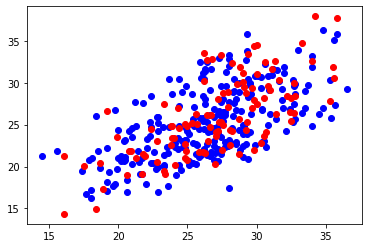

In [ ]:
plt.scatter(x_train,y_train, color='blue')
plt.scatter(x_test,y_test, color='red')

##Treinamento

###Train

In [ ]:
model_split = LinearRegression().fit(x_train,y_train)

In [ ]:
Y_hat_Train = model_split.predict(x_test)

print("Resultados conjunto de treino")
print("-"*40)
print("Intercepto: {:.2f}".format(model_split.intercept_))
print("Coeficiente: {:.2f}".format(model_split.coef_[0]))
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(Y_hat_Train,x_test))))
print("R2: {:.2f}".format(r2_score(y_test,Y_hat_Train)))

Resultados conjunto de treino
----------------------------------------
Intercepto: 9.19
Coeficiente: 0.60
RMSE: 2.28
R2: 0.46


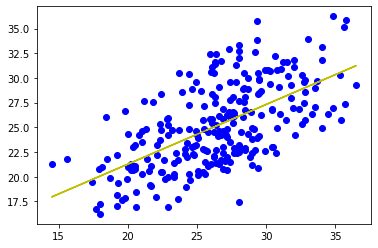

In [ ]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,model_split.coef_[0]*x_train+model_split.intercept_,"-y")

###Test

In [ ]:
Y_hat_Test = model_split.predict(x_test)
print("Resultados conjunto de teste")
print("-"*40)
print("Intercepto: {:.2f}".format(model_split.intercept_))
print("Coeficiente: {:.2f}".format(model_split.coef_[0]))
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test, Y_hat_Test))))
print("R2: {:.2f}".format(r2_score(y_test, Y_hat_Test)))

Resultados conjunto de teste
----------------------------------------
Intercepto: 9.19
Coeficiente: 0.60
RMSE: 3.43
R2: 0.46


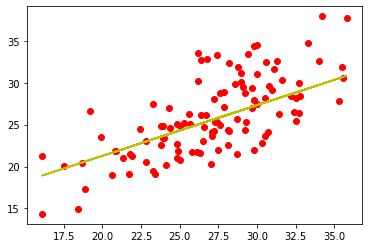

In [ ]:
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, model_split.coef_[0]*x_test + model_split.intercept_, '-y')

#Multivariavel

In [ ]:
df_noNull

,data,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacao_mm,final_de_semana,consumo_de_cerveja_litros
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1,32.307
361,2015-12-28,22.64,21.1,26.7,0.0,0,26.095
362,2015-12-29,21.68,20.3,24.1,10.3,0,22.309
363,2015-12-30,21.38,19.3,22.4,6.3,0,20.467


##Criando Modelo


In [ ]:
X_MV = df_noNull[['temperatura_maxima_c','final_de_semana']]
y_MV = df_noNull['consumo_de_cerveja_litros']

In [ ]:
X_MV_train, X_MV_test, y_MV_train, y_MV_test = train_test_split(
    X_MV,
    y_MV,
    test_size=0.3,
    random_state = 42
)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(255, 1)
(110, 1)
(255,)
(110,)


##Treinando

In [ ]:
mv_model = LinearRegression().fit(X_MV_train, 
                                  y_MV_train)

yhat_mv_test = mv_model.predict(X_MV_test)
yhat_mv_train = mv_model.predict(X_MV_train)

r2_test = r2_score(y_MV_test, yhat_mv_test)
r2_train = r2_score(y_MV_train, yhat_mv_train)

r2_train_test = 1-((1-r2_test)*(X_MV_test.shape[0]-1)/(X_MV_test.shape[0]-X_MV_test.shape[1]-1))
r2_train_ajust = 1-((1-r2_train)*(X_MV_train.shape[0]-1)/(X_MV_train.shape[0]-X_MV_train.shape[1]-1))

rmse_test = np.sqrt(mean_squared_error(y_MV_test,
                                       yhat_mv_test))
rmse_train = np.sqrt(mean_squared_error(y_MV_train, 
                                        yhat_mv_train))

print("Modelo: ")
print("Intercepto: {}".format(mv_model.intercept_))
print("Coeficientes: {}".format(mv_model.coef_))
print("="*20)
print("Resultados de teste")
print("RMSE = {}".format(rmse_test))
print("R2 = {}".format(r2_test))
print("R2 ajustado = {}".format(round(r2_train_test,2)))
print("="*20)
print("Resultados de treino")
print("RMSE = {}".format(rmse_train))
print("R2 = {}".format(r2_train))
print("R2 ajustado = {}".format(r2_train_ajust))

Modelo: 
Intercepto: 5.7978009663452355
Coeficientes: [0.67951491 5.4278942 ]
Resultados de teste
RMSE = 2.5139920592601306
R2 = 0.710245724555824
R2 ajustado = 0.7
Resultados de treino
RMSE = 2.383278305783236
R2 = 0.6845733549625803
R2 ajustado = 0.6820699688908547
